# Auto reload modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import scripts.plots as plots 
import seaborn as sns
import pandas as pd
import numpy as np
import fs

In [3]:
ITNERIM_DIR = fs.open_fs("../../data/interim/project")
CARS_CLEAN_CSV_DIR = ITNERIM_DIR.getsyspath("car_dataframe_clean.csv")

df = pd.read_csv(CARS_CLEAN_CSV_DIR)

In [4]:
df

,fuel_consumption_km_l,traccion,transmision,horsepower,fuel_type,displacement,gears,engine_type,torque,turbo,brand,age,body_type
0,7.0,4x2,Automático,449,Estándar,3.0,7.0,Combustión,516,Sí,Mercedes Benz,9,Sedan
1,10.0,4x4,Automático,310,Estándar,3.0,8.0,Combustión,325,Sí,Audi,7,Sedan
2,11.0,4x4,Automático,300,Estándar,2.0,8.0,Combustión,295,Sí,Jaguar Xe,6,Sedan
3,17.0,4x2,Automático,150,Estándar,1.4,7.0,Combustión,148,Sí,Seat,6,Suv
4,12.0,4x4,Automático,320,Gasolina,2.0,8.0,Combustión,295,Sí,Volvo,7,Suv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,16.0,4x2,Manual,140,Gasolina,1.8,5.0,Combustión,129,No,Chevrolet,10,Suv
1231,17.0,4x2,Manual,107,Gasolina,1.6,5.0,Combustión,104,No,Chevrolet,3,Sedan
1232,17.0,4x2,Manual,100,Gasolina,1.6,5.0,Combustión,105,No,Volkswagen,6,Hatchback
1233,14.0,4x2,Manual,100,Gasolina,1.6,5.0,Combustión,105,No,Volkswagen,9,Sedan


# Análisis estadístico

In [5]:
df.describe()

,fuel_consumption_km_l,horsepower,displacement,gears,torque,age
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,12.627530,181.995142,2.150850,6.214575,187.634818,7.548178
std,3.430564,79.928716,0.917269,1.184769,81.078610,2.304580
min,5.000000,66.000000,1.000000,4.000000,67.000000,3.000000
25%,9.000000,121.000000,1.600000,6.000000,115.000000,6.000000
50%,13.000000,156.000000,2.000000,6.000000,177.000000,7.000000
75%,15.000000,240.000000,2.500000,7.000000,252.000000,9.000000
max,30.000000,557.000000,6.200000,10.000000,561.000000,15.000000


In [6]:
brand_counts = pd.DataFrame(df['brand'].value_counts())
brand_counts

,count
brand,
Chevrolet,104
Volkswagen,101
Mazda,80
Ford,79
Kia,71
Bmw,65
Mercedes Benz,60
Audi,57
Toyota,51


In [6]:
brand_counts = pd.DataFrame(df['body_type'].value_counts())
brand_counts

,count
body_type,
Suv,467
Sedan,319
Hatchback,310
Coupe,40
Pickup,35
Minivan,33
Convertible,12
Wagon,11
Van,5


Análisis de correlación

In [7]:
df.columns

Index(['fuel_consumption_km_l', 'traccion', 'transmision', 'horsepower',
       'fuel_type', 'displacement', 'gears', 'engine_type', 'torque', 'turbo',
       'brand', 'age'],
      dtype='object')

In [8]:
df.sample(30)

,fuel_consumption_km_l,traccion,transmision,horsepower,fuel_type,displacement,gears,engine_type,torque,turbo,brand,age
938,11.0,4x4,Automático,249,Híbrido,2.0,7.0,Mild Hybrid,273,Sí,Audi,4
1108,17.0,4x2,Manual,105,Gasolina,1.5,5.0,Combustión,105,No,Ford,8
353,10.0,4x4,Automático,320,Gasolina,2.0,8.0,Combustión,295,Sí,Volvo,9
17,12.0,4x2,Automático,272,Estándar,2.0,8.0,Combustión,260,Sí,Cadillac,9
1070,17.0,4x2,Automático,148,Estándar,1.4,7.0,Combustión,184,Sí,Volkswagen,7
102,13.0,4x2,Manual,147,Estándar,2.0,6.0,Combustión,132,No,Kia,7
1007,14.0,4x4,Automático,181,Gasolina,1.5,8.0,Combustión,190,Sí,Ford,3
445,15.0,4x2,Automático,140,Gasolina,1.8,6.0,Combustión,129,No,Chevrolet,5
289,14.0,4x2,Manual,120,Gasolina,1.6,6.0,Combustión,112,No,Kia,8
409,12.0,4x2,Automático,181,Gasolina,2.0,8.0,Combustión,214,Sí,Bmw,6


<Axes: >

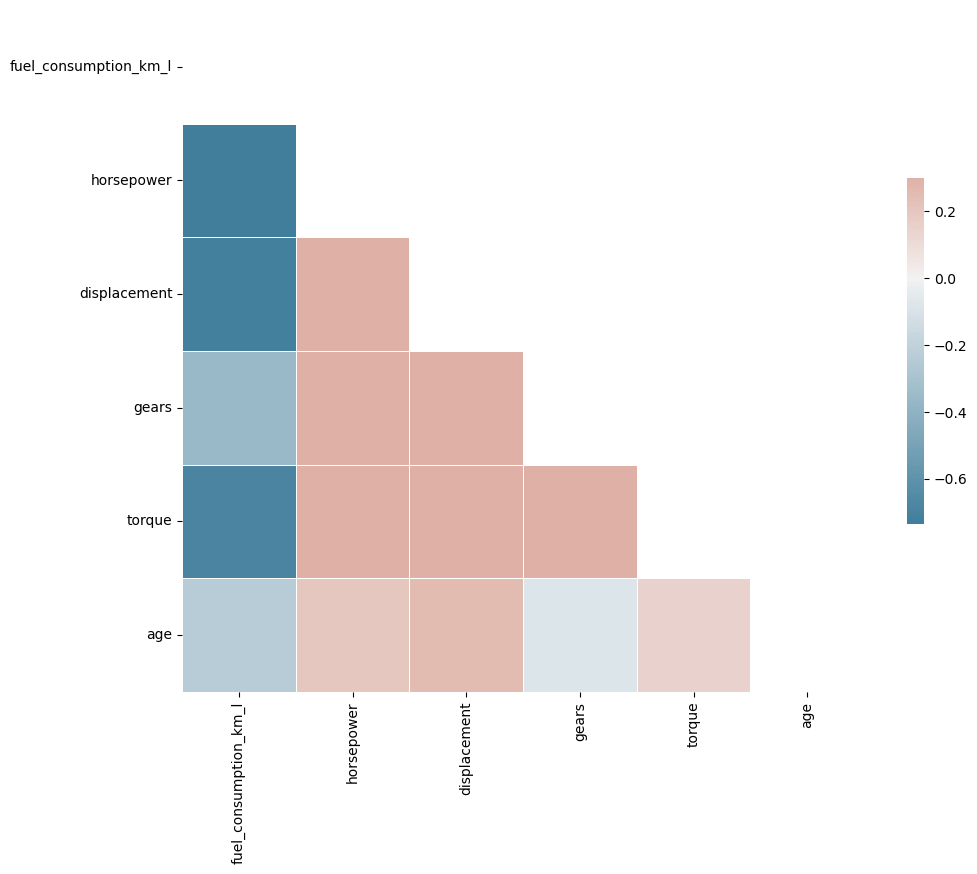

In [10]:
columns_of_interest = ['fuel_consumption_km_l', 'horsepower', 'displacement', 'gears', 'torque', 'age']
# Compute the correlation matrix
corr = df[columns_of_interest].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
df[columns_of_interest].corr()

,fuel_consumption_km_l,horsepower,displacement,gears,torque,age
fuel_consumption_km_l,1.000000,-0.735260,-0.719528,-0.357577,-0.693283,-0.240443
horsepower,-0.735260,1.000000,0.848734,0.545891,0.952813,0.196447
displacement,-0.719528,0.848734,1.000000,0.299951,0.776564,0.255274
gears,-0.357577,0.545891,0.299951,1.000000,0.584522,-0.087565
torque,-0.693283,0.952813,0.776564,0.584522,1.000000,0.143741
age,-0.240443,0.196447,0.255274,-0.087565,0.143741,1.000000


c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


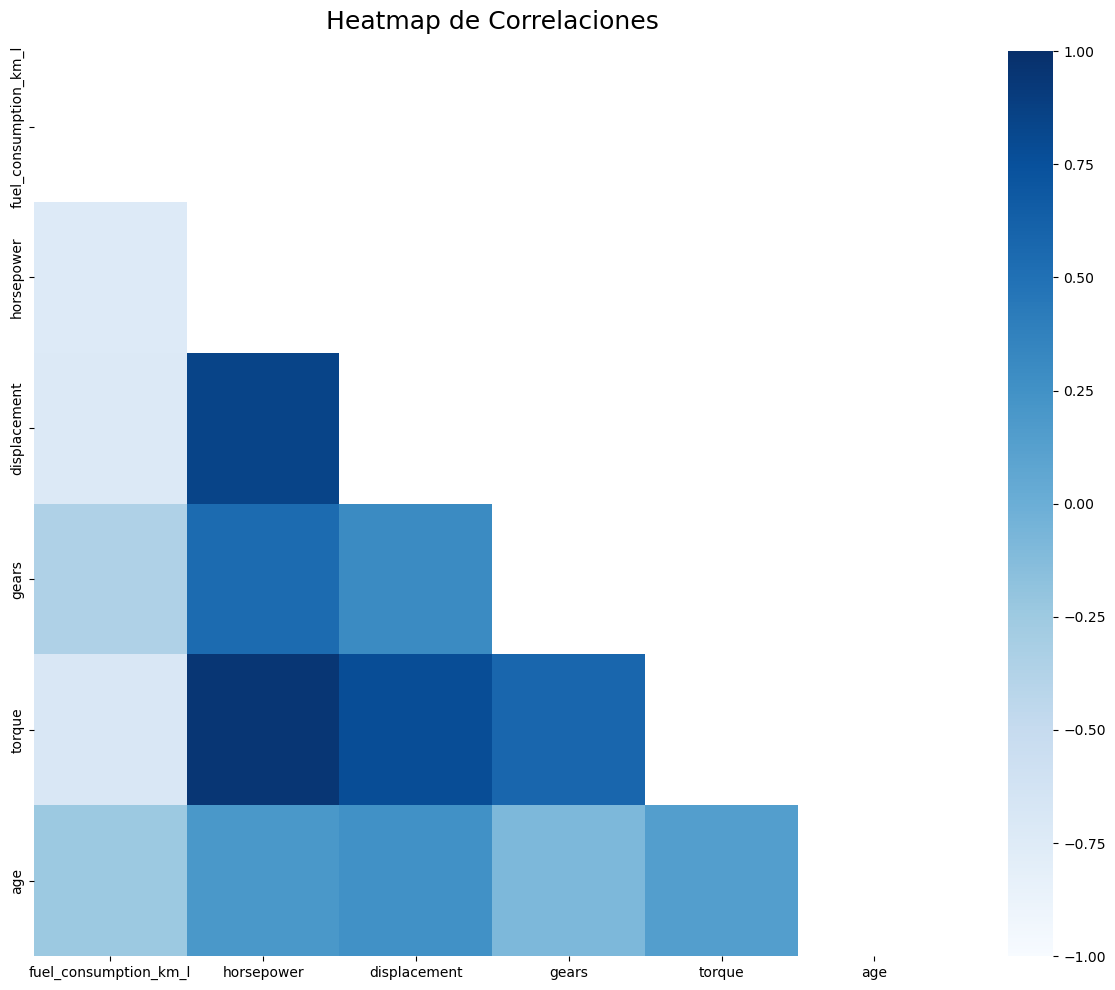

In [12]:
correlation_matrix = df[columns_of_interest].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Blues', vmin=-1, vmax=1)
heatmap.set_title('Heatmap de Correlaciones', fontdict={'fontsize': 18}, pad=16)
plt.tight_layout()
plt.show()

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='horsepower', ylabel='torque'>

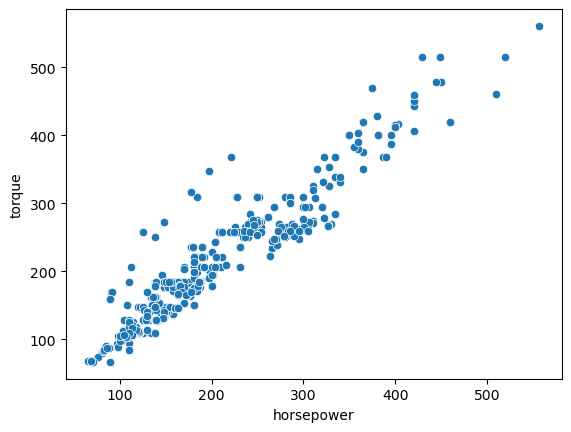

In [23]:
sns.scatterplot(data=df, x="horsepower", y="torque")

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='horsepower', ylabel='displacement'>

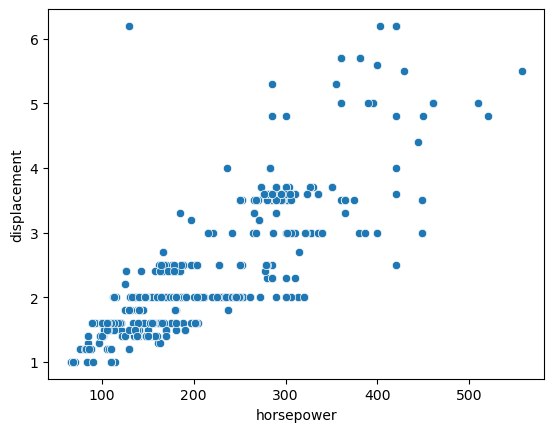

In [25]:
sns.scatterplot(data=df, x="horsepower", y="displacement")

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


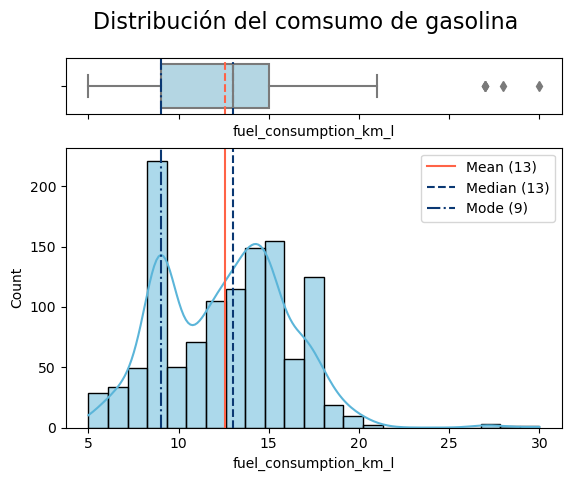

In [13]:
plots.plot_distribution(data=df, column="fuel_consumption_km_l", title="Distribución del comsumo de gasolina")

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


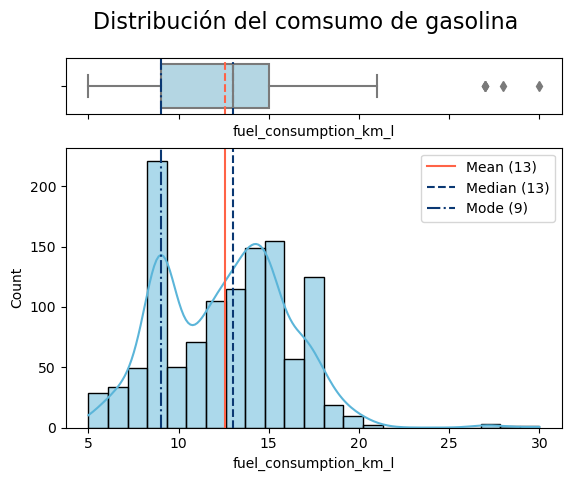

In [14]:
plots.plot_distribution(data=df, column="fuel_consumption_km_l", title="Distribución del comsumo de gasolina")

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


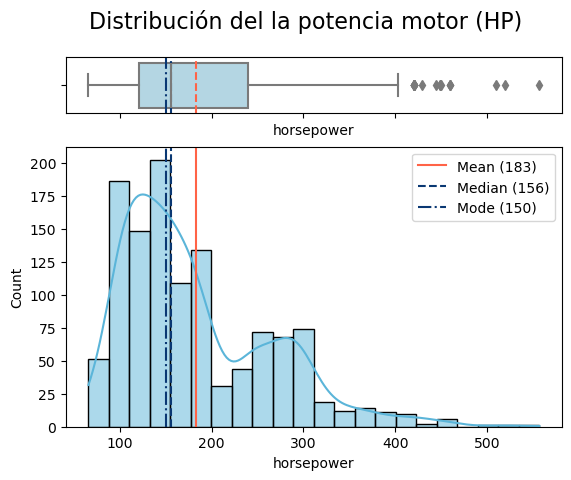

In [15]:
plots.plot_distribution(data=df, column="horsepower", title="Distribución del la potencia motor (HP)")

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


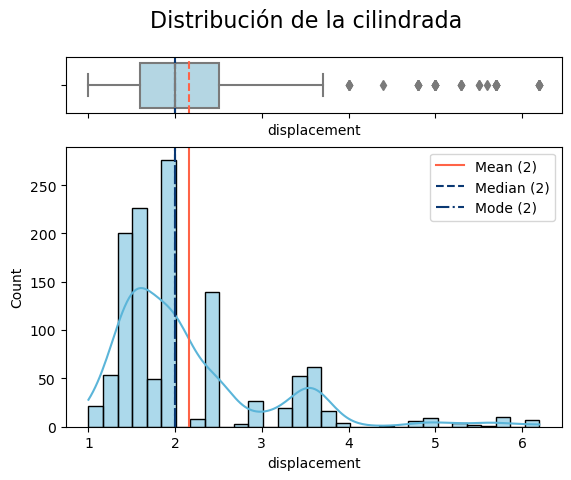

In [16]:
plots.plot_distribution(data=df, column="displacement", title="Distribución de la cilindrada")

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


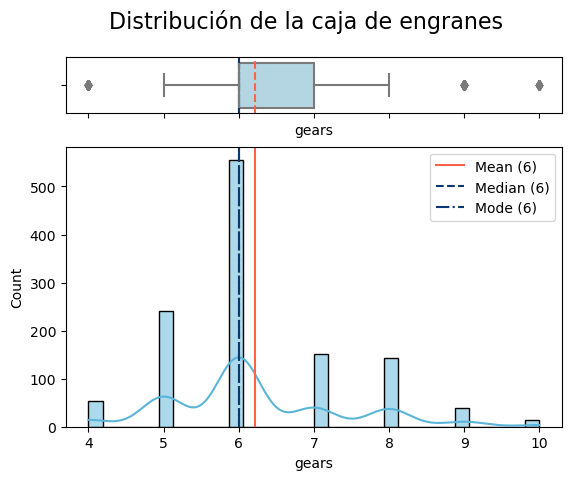

In [17]:
plots.plot_distribution(data=df, column="gears", title="Distribución de la caja de engranes")

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


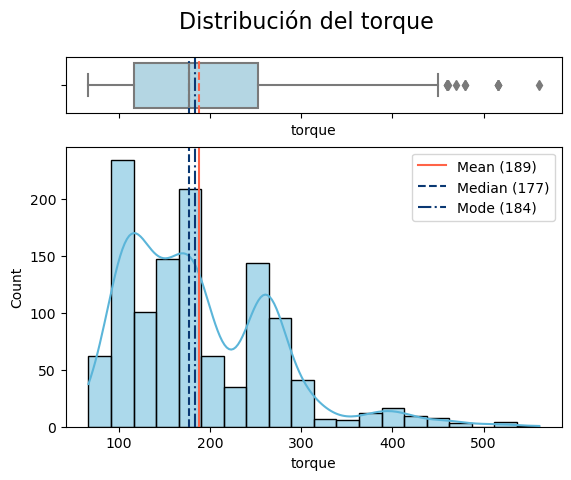

In [18]:
plots.plot_distribution(data=df, column="torque", title="Distribución del torque")

c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Anony\anaconda3\envs\mcd_econometrics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


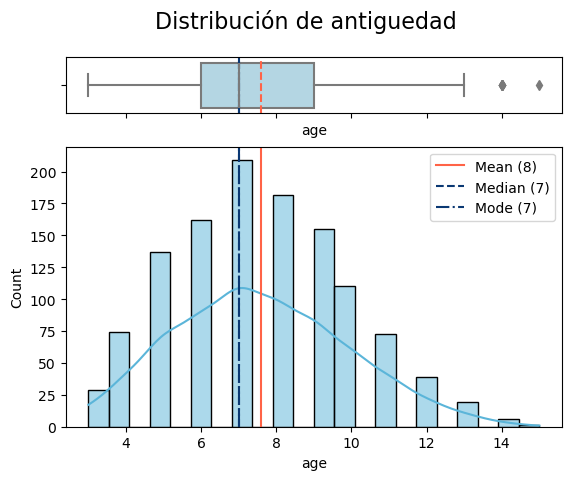

In [19]:
plots.plot_distribution(data=df, column="age", title="Distribución de antiguedad")

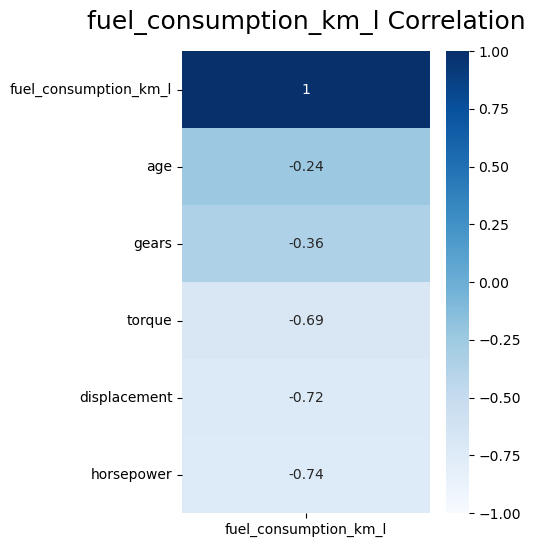

In [20]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df[columns_of_interest].corr()[['fuel_consumption_km_l']].sort_values(by='fuel_consumption_km_l', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('fuel_consumption_km_l Correlation', fontdict={'fontsize': 18}, pad=16)
plt.show()